In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
features = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

In [41]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [42]:
data = df[features]
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [43]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [44]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [45]:
data = data.fillna(0)

In [46]:
data.rename(columns={"msrp":"price"}, inplace=True)

Question 1

What is the most frequent observation (mode) for the column transmission_type?

In [48]:
data.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

Question 2: What are the two features that have the biggest correlation in this dataset?

engine_hp and year
engine_hp and engine_cylinders
highway_mpg and engine_cylinders
highway_mpg and city_mpg

<AxesSubplot:>

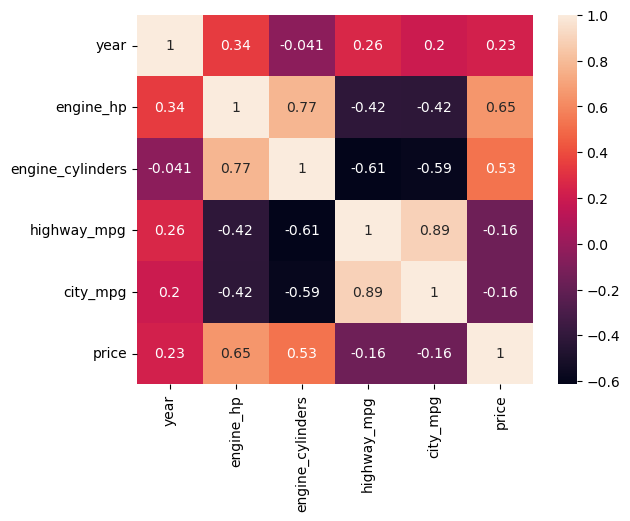

In [49]:
corrMatrix = data[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','price']].corr()

sns.heatmap(corrMatrix, annot=True)

In [50]:
price_mean = data.price.mean()
print(price_mean)

40594.737032063116


Question 3

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the lowest mutual information score?

make
model
transmission_type
vehicle_style


In [51]:
data['above_average'] = (data.price > price_mean).astype('int')

In [53]:
data.above_average.value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train = df_train.above_average.values
y_val = df_val.above_average.values


In [119]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [120]:
del df_train['price']
del df_val['price']
del df_test['price']

In [121]:
print(len(df_train))
print(len(df_val))
print(len(df_test))

7148
2383
2383


In [60]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475


In [61]:
categorical = ['make','model','transmission_type','vehicle_style']

In [62]:
df_train[categorical].head()

,make,model,transmission_type,vehicle_style
3972,Mitsubishi,Endeavor,AUTOMATIC,4dr SUV
1997,Kia,Borrego,AUTOMATIC,4dr SUV
5216,Lamborghini,Gallardo,MANUAL,Convertible
2805,Chevrolet,Colorado,AUTOMATIC,Crew Cab Pickup
11369,Pontiac,Vibe,AUTOMATIC,4dr Hatchback


In [68]:
from IPython.display import display
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return round(mutual_info_score(series, df_train.above_average),2)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


Question 4

Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

In [70]:
from sklearn.feature_extraction import DictVectorizer

In [91]:
train_dict = df_train.to_dict(orient='records')

In [92]:
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [93]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [94]:
X_train.shape

(7148, 943)

In [95]:
dv.feature_names_

['city_mpg',
 'engine_cylinders',
 'engine_hp',
 'highway_mpg',
 'make=Acura',
 'make=Alfa Romeo',
 'make=Aston Martin',
 'make=Audi',
 'make=BMW',
 'make=Bentley',
 'make=Bugatti',
 'make=Buick',
 'make=Cadillac',
 'make=Chevrolet',
 'make=Chrysler',
 'make=Dodge',
 'make=FIAT',
 'make=Ferrari',
 'make=Ford',
 'make=GMC',
 'make=Genesis',
 'make=HUMMER',
 'make=Honda',
 'make=Hyundai',
 'make=Infiniti',
 'make=Kia',
 'make=Lamborghini',
 'make=Land Rover',
 'make=Lexus',
 'make=Lincoln',
 'make=Lotus',
 'make=Maserati',
 'make=Maybach',
 'make=Mazda',
 'make=McLaren',
 'make=Mercedes-Benz',
 'make=Mitsubishi',
 'make=Nissan',
 'make=Oldsmobile',
 'make=Plymouth',
 'make=Pontiac',
 'make=Porsche',
 'make=Rolls-Royce',
 'make=Saab',
 'make=Scion',
 'make=Spyker',
 'make=Subaru',
 'make=Suzuki',
 'make=Tesla',
 'make=Toyota',
 'make=Volkswagen',
 'make=Volvo',
 'model=1 Series',
 'model=100',
 'model=124 Spider',
 'model=190-Class',
 'model=2',
 'model=2 Series',
 'model=200',
 'model=20

In [96]:

from sklearn.linear_model import LogisticRegression


In [97]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [99]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [100]:
model.predict_proba(X_val)

array([[9.99682176e-01, 3.17823817e-04],
       [2.20616593e-03, 9.97793834e-01],
       [9.99939046e-01, 6.09541899e-05],
       ...,
       [9.99909732e-01, 9.02681636e-05],
       [8.44335654e-03, 9.91556643e-01],
       [1.00070943e-02, 9.89992906e-01]])

In [101]:
y_pred = model.predict_proba(X_val)[:, 1]

In [102]:
y_pred

array([3.17823817e-04, 9.97793834e-01, 6.09541899e-05, ...,
       9.02681636e-05, 9.91556643e-01, 9.89992906e-01])

In [103]:
above_average = y_pred > 0.5

In [115]:
round((y_val == above_average).mean(),2)

0.95

Question 5

Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

year
engine_hp
transmission_type
city_mpg


In [111]:
for n in df_train.columns:
    print(n)
    df_train = df_train.loc[ : , df_train.columns != n]
    df_val = df_val.loc[ : , df_val.columns != n]

    train_dict = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)  

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    above_average = y_pred > 0.5

    accuracy = round((y_val == above_average).mean(),2)

    diff = 0.95 - accuracy

    print(f"Exclude {n}, accuracy is {accuracy}, difference {diff}.")


In [124]:
for n in df_train.columns:
    print(n)
    df_t = df_train.loc[ : , df_train.columns != n]
    df_v = df_val.loc[ : , df_val.columns != n]

    train_dict = df_t.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)  

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_v.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    above_average = y_pred > 0.5

    accuracy = (y_val == above_average).mean()

    diff = 0.95 - accuracy

    print(f"Exclude {n}, accuracy is {accuracy}, difference {diff}.")


make
Exclude make, accuracy is 0.946286193873269, difference 0.0037138061267310007.
model
Exclude model, accuracy is 0.9160721779269828, difference 0.033927822073017144.
year
Exclude year, accuracy is 0.9475451112043642, difference 0.0024548887956357124.
engine_hp
Exclude engine_hp, accuracy is 0.9303399076793957, difference 0.019660092320604283.
engine_cylinders
Exclude engine_cylinders, accuracy is 0.9471254720939991, difference 0.0028745279060008455.
transmission_type
Exclude transmission_type, accuracy is 0.9450272765421738, difference 0.004972723457826178.
vehicle_style
Exclude vehicle_style, accuracy is 0.9378934116659673, difference 0.012106588334032664.
highway_mpg
Exclude highway_mpg, accuracy is 0.9467058329836341, difference 0.0032941670163658676.
city_mpg
Exclude city_mpg, accuracy is 0.946286193873269, difference 0.0037138061267310007.


In [ ]:
for n in df_train.columns:
    print(n)
    df_t = df_train.loc[ : , df_train.columns != n]
    df_v = df_val.loc[ : , df_val.columns != n]

    train_dict = df_t.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)  

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_v.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    above_average = y_pred > 0.5

    accuracy = (y_val == above_average).mean()

    diff = 0.95 - accuracy

    print(f"Exclude {n}, accuracy is {accuracy}, difference {diff}.")

Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn.
We'll need to use the original column price. Apply the logarithmic transformation to this column.
Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
Round your RMSE scores to 3 decimal digits.
Which of these alphas leads to the best RMSE on the validation set?

In [132]:
from sklearn.linear_model import LinearRegression, Ridge

In [126]:
del data['above_average']

In [127]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [130]:
del df_train['price']
del df_val['price']
del df_test['price']

In [131]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [144]:
def rmse(y, y_pred):
    error = y_pred - y
    rmse = (error ** 2).mean()
    return round(np.sqrt(rmse),3)

In [141]:
def model_training(df_train,df_val,r):
    train_dict = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)  

    model = Ridge(solver='sag', alpha=r, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    return y_pred
    # rmse = rmse(y_val, y_pred)
    # print(f"RMSE for alpha = {r} is {rmse(y_val, y_pred)}")


In [145]:
for r in [0, 0.01, 0.1, 1, 10]:
    y_pred = model_training(df_train, df_val, r)
    print(f"for alpha {r} = {rmse(y_val, y_pred)}")

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


for alpha 0 = 0.487


/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


for alpha 0.01 = 0.487


/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


for alpha 0.1 = 0.487


/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


for alpha 1 = 0.487
for alpha 10 = 0.487


/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
